# Projeto de Dados: Dados de Criminalidade em São Paulo em 2022

## Integrantes do grupo

| Nome           | Matrícula |
|---------------|-----------|
| Rafael Chang  | 5783      |
| Ayko Berger   | 5785      |
| Pedro Elecio  | 5786      |
| Tiago Nunes   | 5372      |


Em primeiro momento, o objetivo era fazer uma primeira análise e compreesão dos dados que foram a nós disponibilizados, para que possamos elaborar algumas perguntas que serão respondidas com esses dados.

Após alguns dias de discussão, chegamos a conclusão que a melhor forma que explorar uma maior quantidade de dados e, fazer algo interessante, seria elaborar uma espécie de algoritmo que nos ajude a conseguir planejar um período de férias em São Paulo, de modo que o mesmo ajude a evitar locais, horários e características que segundo o banco de dados, são mais propensos a sofrer algum tipo de crime. Tudo isso a partir da análise dos dados disponibilizados.

Então desenvolvemos as seguintes perguntas:

-1. Qual a melhor epoca do ano para ir em São Paulo? (baseado na quantidade de casos de BOs)

-2. Qual os bairros mais perigosos para serem evitados?

-3. Quais as cidades mais perigosas do Estado de São Paulo?

-4. Quais as 10 ruas para se evitar de ir no Estado de São Paulo?

-5. Quero alugar um veiculo para rodar, quais deveria evitar? (por terem maior quantidade de BOs envolvidos, moto ou carro?)

-6. A chance de uma pessoa ser roubada é maior a noite?

-7. Quais os tipos de crime que os idosos mais sofrem?

-8. Quais os tipos de crimes mais comuns em São Paulo durante diferentes épocas do ano?

-9. Qual a relação entre o local do crime e o tipo de crime cometido?

-10. Qual a relação entre o local do crime e a taxa de solução do crime?


A princípio, todos os participantes trabalharam juntos na elaboração das perguntas, afinal, como as mesmas funcionarão como alicerce do projeto, todos deveriam estar de acordo.

# Análise exploratótia dos dados

Para a parte de exploração dos dados, primeiro fizemos a extração dos tipos dos dados que estão disponibilizados no artigo, para mais fácil compreensão de como estão organizados.

# Tipos de Dados do Boletim de Ocorrência



## Informações Gerais

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| NUM_BO                          | Número do boletim de ocorrência |
| ANO_BO                          | Ano do boletim de ocorrência |
| CODIGO_BOLETIM                  | Junção do número de boletim com o ano do boletim separados por ‘/’ |
| NATUREZA_APURADA                | Tipo de crime cometido |
| DATA_OCORRENCIA                 | Data em que o crime ocorreu |
| HORA_OCORRENCIA                 | Hora em que o crime ocorreu |
| PERIODO_OCORRENCIA              | Período do dia em que o crime ocorreu |
| CIDADE                          | Cidade em que o crime ocorreu |
| LOGRADOURO                      | Via em que o crime ocorreu |
| NUMERO_LOGRADOURO               | Número que identifica o local do crime na via |
| BAIRRO                          | Bairro em que o crime ocorreu |
| UF                              | Sigla da unidade federativa |
| TIPO_LOCAL                      | Tipo de local em que o crime ocorreu |
| LATITUDE                        | Latitude do ponto do crime |
| LONGITUDE                       | Longitude do ponto do crime |

## Delegacia e Departamentos

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| DELEGACIA_ELABORACAO            | Delegacia onde o BO foi elaborado |
| DEPARTAMENTO_ELABORACAO         | Departamento onde o BO foi elaborado |
| SECCIONAL_ELABORACAO            | Seccional onde o BO foi elaborado |
| DELEGACIA_CIRCUNSCRICAO         | Delegacia responsável pela área geográfica onde o crime ocorreu.|
| DEPARTAMENTO_CIRCUNSCRICAO       | Departamento policial ao qual a delegacia circunscricional está vinculada.|
| SECCIONAL_CIRCUNSCRICAO        | Seccional de polícia que supervisiona a delegacia circunscricional.|

## Dados da Pessoa Envolvida

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| TIPO_PESSOA                     | Indica se a pessoa é a vítima ou autora |
| SEXO_PESSOA                   | Gênero da pessoa |
| IDADE_PESSOA                    | Idade da pessoa |
| DATA_NASCIMENTO_PESSOA          | Data de nascimento |
| COR_PELE                        | Cor de pele |
| PROFISSAO                       | Profissão |

## Dados do Veículo (se aplicável)

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| PLACA_VEICULO                   | Placa do veículo |
| UF_VEICULO                      | Unidade federativa do emplacamento |
| CIDADE_VEICULO                  | Cidade do emplacamento |
| COR_VEICULO                     | Cor do veículo |
| MARCA_VEICULO                   | Marca do veículo |
| MODELO_VEICULO                  | Modelo do veículo |
| ANO_FABRICACAO                  | Ano de fabricação do veículo |
| ANO_MODELO                      | Ano do modelo do veículo |
| TIPO_VEICULO                    | Tipo do veículo |

## Dados do Celular (se aplicável)

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| MARCA_CELULAR                   | Marca do celular |
| QUANT_CELULAR                   | Quantidade de celulares |

## Outras Informações

| Nome do Campo                  | Descrição do Campo |
|---------------------------------|--------------------|
| BO_INICIADO                     | Data e hora em que o BO foi iniciado |
| BO_EMITIDO                      | Data e hora em que o BO foi concluído |
| DATA_HORA_ELABORACAO            | Data e hora de elaboração do BO |
| DATA_COMUNICACAO                | Data de comunicação à delegacia |
| BO_AUTORIA                      | Responsável pelo BO |
| FLAGRANTE                       | Indica se foi situação de flagrante |
| EXAME                           | Responsável pelo exame de corpo |
| SOLUCAO                         | Tipo de solução dada ao crime |
| ESPECIE                         | Espécie de patrimônio envolvido |
| STATUS                          | Status do crime |
| FLAG_VITIMA_FATAL               | Indica se houve vítimas fatais |
| DESDOBRAMENTO                   | Desdobramento do caso |


# Inicialização do Projeto

Neste primeiro momento, precisamos importar as bibliotecas necessárias e carregar os dados que serão utilizados ao longo do projeto.
Tudo relacionado a essa etapa está organizado nesta seção.

## Importação de Bibliotecas

In [1]:
#imports (1)
import os
import folium
import unicodedata
import locale

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import binomtest
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
#Imports para Regressão Linear
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [29]:
#Imports Aprendizado Não  Supervisionado
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Carregamento do DataSet (Colab - Google Drive)

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
#Obter o dataframe, que contenha dados sobre as cidades do Brasil, nome e codigo ibge delas
#Fonte: https://github.com/chandez/Estados-Cidades-IBGE/tree/master/csv

csv_path_municipios = "/content/drive/MyDrive/Dados/municipios.csv"
df_m = pd.read_csv(csv_path_municipios, delimiter=",", low_memory=False, index_col = 0)

In [26]:
#Importar Dados para o Colab direto do drive

#csv_path = "/content/drive/MyDrive/Dados/SPSafe_2022.csv"
#df = pd.read_csv(csv_path, delimiter=";", low_memory=False)

#Para carregar o data set ja tratado:

csv_path_tratado = "/content/drive/MyDrive/Dados/dados_tratados.csv"
df_tratado = pd.read_csv(csv_path_tratado, delimiter=",", low_memory=False)
df = df_tratado

## Carregamento do DataSet (Local)



In [ ]:
#Carregar o dataset (1)

csv_path = "Dados/SPSafe_2022.csv"
df = pd.read_csv(csv_path, delimiter=";", low_memory=False)

In [ ]:
#Obter o dataframe, que contenha dados sobre as cidades do Brasil, nome e codigo ibge delas
#Fonte: https://github.com/chandez/Estados-Cidades-IBGE/tree/master/csv

csv_path_municipios = "Dados/municipios.csv"
df_m = pd.read_csv(csv_path_municipios, delimiter=",", low_memory=False, index_col = 0)
df_m.info()

In [ ]:
#Carregamento do dataset ja tratado:
df_tratado = pd.read_csv('Dados/dados_tratados.csv')
df = df_tratado

C:\Users\USER\AppData\Local\Temp\ipykernel_12980\390802529.py:2: DtypeWarning: Columns (10,11,16,17,19,20,21,22,24,25,26,27,28,29,30,31,32,35,36,38,39,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tratado = pd.read_csv('Dados/dados_tratados.csv')


# Compreensão e tratamento dos Dados  
  
Para essa primeira analise do dataset que estamos trabalhando, é importante estarmos cientes dos tipos de dados, colunas e linhas presentes no dataset, assim como verificar a presença de valores nulos em cada coluna e também a presença de valores duplicados, que possam atrapalhar em nossa analise futura.  

Com base na quantidade de valores nulos em cada coluna, consideramos tirar/remover aquelas que contém mais de 90% dos dados nulos, pois poderiam não dar uma representação aceitavel dos dados que queremos utilizar. Porém não apagamos pois como o trabalho é incremental, posteriormente poderemos utilizar esses dados para algo, mas a quantidade nos influenciou bastante em quais priorizar.

In [ ]:
#Indentificar as colunas que contenham dados nulos e a quantidade (2)
df = df.dropna(subset=['NUM_BO']) # Remoção dos BOs que não tinham numero.
df.isnull().sum()


NUM_BO                             0
ANO_BO                             0
CODIGO_BOLETIM                     0
NATUREZA_APURADA                   0
DATA_OCORRENCIA                  698
HORA_OCORRENCIA               157316
PERIODO_OCORRENCIA              5949
CIDADE                        695434
LOGRADOURO                     53471
NUMERO_LOGRADOURO               2457
BAIRRO                         39783
UF                             30169
TIPO_LOCAL                         7
LATITUDE                      114125
LONGITUDE                     114125
DELEGACIA_ELABORACAO               0
DEPARTAMENTO_ELABORACAO       691067
SECCIONAL_ELABORACAO          691067
DELEGACIA_CIRCUNSCRICAO            0
DEPARTAMENTO_CIRCUNSCRICAO    691070
SECCIONAL_CIRCUNSCRICAO       691070
TIPO_PESSOA                   688979
SEXO_PESSOA                   689254
IDADE_PESSOA                  691554
DATA_NASCIMENTO_PESSOA        692347
COR_PELE                      714189
PROFISSAO                     708449
P

Para o começo de tudo operações basicas, que nos ajudarão a termos noção com que tipo de dados estamos mechendo:


In [ ]:
#Com isso indentificamos que não há linhas duplicadas (2)
df[df.duplicated()]

In [ ]:
#Temos os tipos dos dados da coluna, numero de linha, quantiade de valores nao nulos (2)
df.info()
df.describe(include='all')

In [ ]:
#configuração de exibição
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 100)

No campo Idade_Pessoa, percebemos um outlier, no meio das idades há uma pessoa com a idade de 122 anos.   
Para tratar iremos remover essa idade e trocar por nulo.

In [ ]:
df['IDADE_PESSOA'] = df['IDADE_PESSOA'].replace(122, np.nan)

Além disso, também achamos necessário remover alguns espaços extras e também a padronização do texto. Para evitar que, por exemplo, "São Paulo", "são paulo" e "SÃO PAULO" fossem tratados como diferentes, sendo que se tratam da mesma cidade.

In [ ]:
df = df.apply(lambda x: x.astype(str).str.strip().str.lower() if x.dtype == "object" else x)

Tratamento do campo Cidade:  
Para podermos trabalhar com as os BOs filtrando por cidades, precisamos entender os dados de cidade que temos no conjunto de dados. Estudando sobre as colunas presentes no data frame (1), notamos que esta presente uma coluna, intitulada "CIDADE", olhando os dados presentes nessa coluna (2), notanos que há presente numeros decimais, pesquisando um pouco, descobrimos que esses numeros são o codigo ibge das cidades, com essa informação tivemos a ideia de com dados externos, conseguir adicionar o nome das cidades a cada BO,ao analisar quantidade de valores nulos na coluna (3), percebemos que a quantidade de valores não nulos nessa coluna era muito baixa, porém mesmo assim decidimos converter o codigo ibge para nomes de cidades, pois poderia ser util.

In [ ]:
df.info() #(1)
df['CIDADE'].unique() #(2)
df['CIDADE'].isnull().sum() #(3)

Temos presentes nessa coluna 'CIDADE' valores que não estao presentes e também, valores '-1.0' que significam que a cidade que ocorreu o BO é desconhecida. Esses dois tipos de dados podem ser tratados da mesma forma para nossa analise. Então trataremos igualmente esses dados subistindo '-1.0' por NaN (1), além disso com os dados do dataframe das cidades, tem o codigo ibge como do tipo inteiro, iremos converter a coluna 'CIDADE' para inteiro também (2).

Para criar uma nova coluna, iremos fazer um merge, utilziando como chaves os codigos ibges de cada dataframe, para podermos adicionar o nome das cidades a cada Bo que tenha um codigo IBGE valido

In [ ]:
df = df.merge(df_m[['Codigo', 'Nome']], left_on='CIDADE', right_on='Codigo', how='left') #Merge para criar uma nova coluna em df
df = df.rename(columns={'Nome': 'NOME_CIDADE'}) #Renomear o nome da coluna, para um que faça mais senitdo
df = df.drop(columns=['Codigo']) #Depois de utilizar a coluna Codigo para o merge, podemos descartala

In [ ]:
df.head()
print(df['NOME_CIDADE'].value_counts())

Tratamento de data e dia da semana através da DATA_OCORRENCIA.
Esse código cria duas novas colunas, a coluna [MES] e a coluna [DIA_SEMANA].

In [ ]:
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

df["DATA_OCORRENCIA"] = pd.to_datetime(df["DATA_OCORRENCIA"], errors='coerce')
#Criação da coluna MES
df["MES"] = df["DATA_OCORRENCIA"].dt.strftime('%B').str.capitalize()
#Criacao da coluna DIA_SEMANA
df["DIA_SEMANA"] = df["DATA_OCORRENCIA"].dt.strftime('%A').str.capitalize()


Criação da coluna [BAIRRO_CATEGORIZADO]

Essa coluna visa facilitar a analise de bairros de São Paulo capital.
Primeiramente realizei uma pesquisa no Google para identificar todos os bairros pertencentes à cidade de São Paulo. Os bairros presentes no dicionário foram retirados do site https://www.estadosecapitaisdobrasil.com/lista-dos-bairros-de-sao-paulo/. A partir dessa pesquisa, elaborei um dicionário contendo apenas os bairros da capital, dividido pela letras iniciais do alfabeto. Tecnicamente falando, criei o coluna BAIRRO_CATEGORIZADO, em que todos os bairros que possuem o mesmo nome de algum bairro de São Paulo capital, fosse incluído como "Bairro", e os que não pertencem a São Paulo capital como "Outro".

O objetivo dessa categorização é garantir que apenas bairros realmente pertencentes a São Paulo capital possam ser analisados, excluindo localidades de outras cidades do estado. Isso foi feito porque, ao observar a categoria "Outro" (bairros não mapeados), ficou evidente que, excetuando bairros como "Centro" (nome comum em muitas cidades) e áreas rurais, a maioria dos bairros fora da capital apresentava um índice de criminalidade muito inferior.

In [ ]:
# Função para padronizar nomes
def padronizar_nome(nome):
    nome = unicodedata.normalize('NFKD', nome).encode('ASCII', 'ignore').decode('utf-8').lower()
    return nome.strip()

bairro_sp = {
    "A": ["Água Rasa", "Alto de Pinheiros", "Anhanguera", "Aricanduva", "Artur Alvim"],
    "B": ["Barra Funda", "Bela Vista", "Belém", "Bom Retiro","Brás", "Brasilândia", "Butantã"],
    "C": ["Cachoeirinha", "Cambuci", "Campo Belo", "Campo Grande", "Campo Limpo", "Cangaíba",
          "Capão Redondo", "Carrão", "Casa Verde", "Cidade Ademar", "Cidade Dutra", "Cidade Líder",
          "Cidade Líder", "Cidade Tiradentes", "Consolação", "Cursino"],
    "E": ["Ermelino Matarazzo"],
    "F": ["Freguesia do Ó"],
    "G": ["Grajaú", "Guaianases"],
    "I": ["Iguatemi", "Ipiranga", "Itaim Bibi", "Itaim Paulista", "Itaquera"],
    "J": ["Jabaquara", "Jaçanã", "Jaguara", "Jaguaré", "Jaraguá", "Jardim Ângela",
          "Jardim Helena", "Jardim Paulista", "Jardim São Luís"],
    "L": ["Lapa", "Liberdade", "Limão"],
    "M": ["Mandaqui", "Marsilac", "Moema", "Mooca", "Morumbi"],
    "P": ["Parelheiros", "Pari", "Parque do Carmo", "Penha", "Perdizes", "Pinheiros", "Ponte Rasa"],
    "R": ["Raposo Tavares", "República", "Rio Pequeno"],
    "S": ["Sacomã", "Santa Cecília", "Santana", "Santo Amaro", "São Domingos", "São Lucas",
          "São Mateus", "São Miguel Paulista", "São Rafael", "Sapopemba", "Saúde", "Sé"],
    "T": ["Tatuapé", "Tremembé", "Tucuruvi"],
    "V": ["Vila Andrade", "Vila Curuçá", "Vila Formosa", "Vila Guilherme", "Vila Jacuí",
          "Vila Leopoldina", "Vila Maria", "Vila Mariana", "Vila Matilde", "Vila Medeiros",
          "Vila Prudente", "Vila Sônia"]
}

#Criação da Lista com os bairros
bairros_mapeados = []
for bairros in bairro_sp.values():
    bairros_mapeados.extend(bairros)

# Chama a função de padronizar
bairros_mapeados_padronizados = [padronizar_nome(bairro) for bairro in bairros_mapeados]

# Essa etapa separa os bairros que são propriamente de São Paulo capital para os que não são
def categorizar_bairro(bairro_df):
    bairro_padronizado = padronizar_nome(bairro_df)
    if bairro_padronizado in bairros_mapeados_padronizados:
        return bairro_df.title()
    else:
        return "Outro"

df["BAIRRO_CATEGORIZADO"] = df["BAIRRO"].apply(categorizar_bairro)

Após isso, iniciamos o processo de elaboração das respostas de algumas perguntas iniciais.

In [ ]:
#Criar dataframe tratado: (Descomentar se quiser fazer uma alteração)

df_tratado = df.copy()
df_tratado.to_csv('dados_tratados.csv', index=False)

# Variaveis usadas em mais de uma pergunta

In [ ]:
# Máscara: período válido (não nulo e não incerto)
mask_periodo = df['PERIODO_OCORRENCIA'].notna() & ~df['PERIODO_OCORRENCIA'].str.contains('em hora incerta', na=False)


In [ ]:
df['NATUREZA_APURADA'].unique()
contagem = df['NATUREZA_APURADA'].value_counts().reset_index()
contagem.columns = ['Natureza_Apurada', 'Quantidade']

contagem


# Criação do Mapa

Seção sobre a criação do Mapa, visa auxiliar em vizualizar os dados para responder as perguntas.

Além de ajudar em alguns tratamentos.
Ele mostra um mapa-mundi, onde de vermelho está marcado os boletins de ocorrência de acordo com a latitude e longitude, e ao clicar no pontinho, ele mostra qual a natureza apurada do boletim.

Para essa análise, foram incluídos 30000 boletins, para não poluir a vizualização do mapa.

In [ ]:
# Cria o mapa centralizado em São Paulo
mapa_sp = folium.Map(location=[-23.5505, -46.6333], zoom_start=11)

# Adicionar pontos no mapa (pode ser um subconjunto para desempenho)
for _, row in df[['LATITUDE', 'LONGITUDE', 'NATUREZA_APURADA']].dropna().sample(30000).iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        popup=row['NATUREZA_APURADA'],
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(mapa_sp)


# Mostrar o mapa (em Jupyter) ou salvar
mapa_sp.save("mapa_crimes_sp.html")


# Perguntas

Seção onde estão encapsuladas, todas as Perguntas, assim como seu entendimento, desenvolvimento, analise e resposta.

## pergunta 1 (Rafael)

1. Qual a melhor epoca do ano para ir em São Paulo? (baseado na quantidade de casos de BOs)

Os 4 meses com menor criminalidade em São Paulo são: ['Julho', 'Fevereiro', 'Janeiro', 'Agosto']
MES
Janeiro      56222.0
Fevereiro    49324.0
Marco            NaN
Abril        57606.0
Maio         61183.0
Junho        60181.0
Julho        49258.0
Agosto       57011.0
Setembro     66032.0
Outubro      70195.0
Novembro     68121.0
Dezembro     63539.0
Name: count, dtype: float64


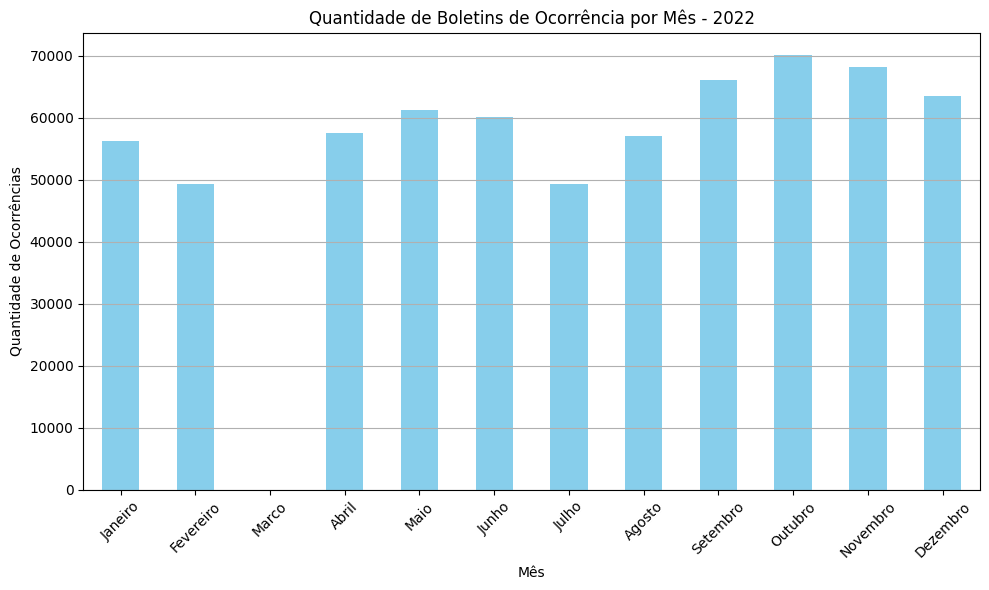

In [ ]:
meses = df["MES"].value_counts()

# Reordenando os meses, para que o gráfico possar ser gerado da maneira correta
ordem_meses = ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
meses = meses.reindex(ordem_meses)

topMeses = meses.sort_values().head(4).index.tolist()

print(f"Os 4 meses com menor criminalidade em São Paulo são: {list(topMeses)}")
print(meses)

plt.figure(figsize=(10,6))
meses.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Boletins de Ocorrência por Mês - 2022')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Através dessa análise temos que os índices mais baixos de criminalidade (baseado na quantidade de BOs) de todo o estado de São Paulo é de Janeiro a Fevereiro, e de Julho a Agosto. Para uma análise mais detalhada, podemos extrair a média da quantidade de crimes que ocorrem a menos nesses meses do que nos outros, visto que os valores não variam em valores exorbitantes.

In [ ]:
# Dados
meses_baixa = [56222, 49325, 49258, 57011]
demais_meses = [61073, 57607, 61183, 60181, 66032, 70195, 68121, 63540]

# Cálculo das médias
media_baixa = sum(meses_baixa) / len(meses_baixa)
media_demais = sum(demais_meses) / len(demais_meses)

# Diferença
diferenca = media_demais - media_baixa

print(f"Média dos meses de baixa: {media_baixa:.0f}")
print(f"Média dos demais meses: {media_demais:.0f}")

Média dos meses de baixa: 52954
Média dos demais meses: 63492


Com isso podemos notar que tem uma diferença de aproximadamente 10000 casos por mês, ou seja, nos meses Janeiro, Fevereiro, Julho e Agosto temos em média 10000 menos casos de criminalidade. Isso é um valor notável para apenas um mês, podendo assumir que esses meses são os melhores para visitar o estado de São Paulo. Nota-se que esses meses são os meses de férias das escolas brasileiras, o que pode ocorrer com o aumento de pessoas entrando e saindo do estado.

## Pergunta 2 (Rafael)


2. Quais os bairros mais perigosos para evitar? (baseado na quantidade de Bos registrados nos períodos com menos BOs)


Top 20 Bairros com Mais BOs:
         Bairro  Total_BOs
      Republica      10240
     Bela Vista       7369
     Consolacao       7110
           Bras       6152
      Pinheiros       6104
             Se       5985
        Tatuape       5508
   Vila Mariana       5432
       Ipiranga       5322
        Santana       5097
Jardim Paulista       4873
  Capao Redondo       4808
    Santo Amaro       4720
     Sao Mateus       4565
      Liberdade       4523
       Itaquera       4430
     Itaim Bibi       4349
    Barra Funda       4341
      Jabaquara       4291
     Bom Retiro       4257


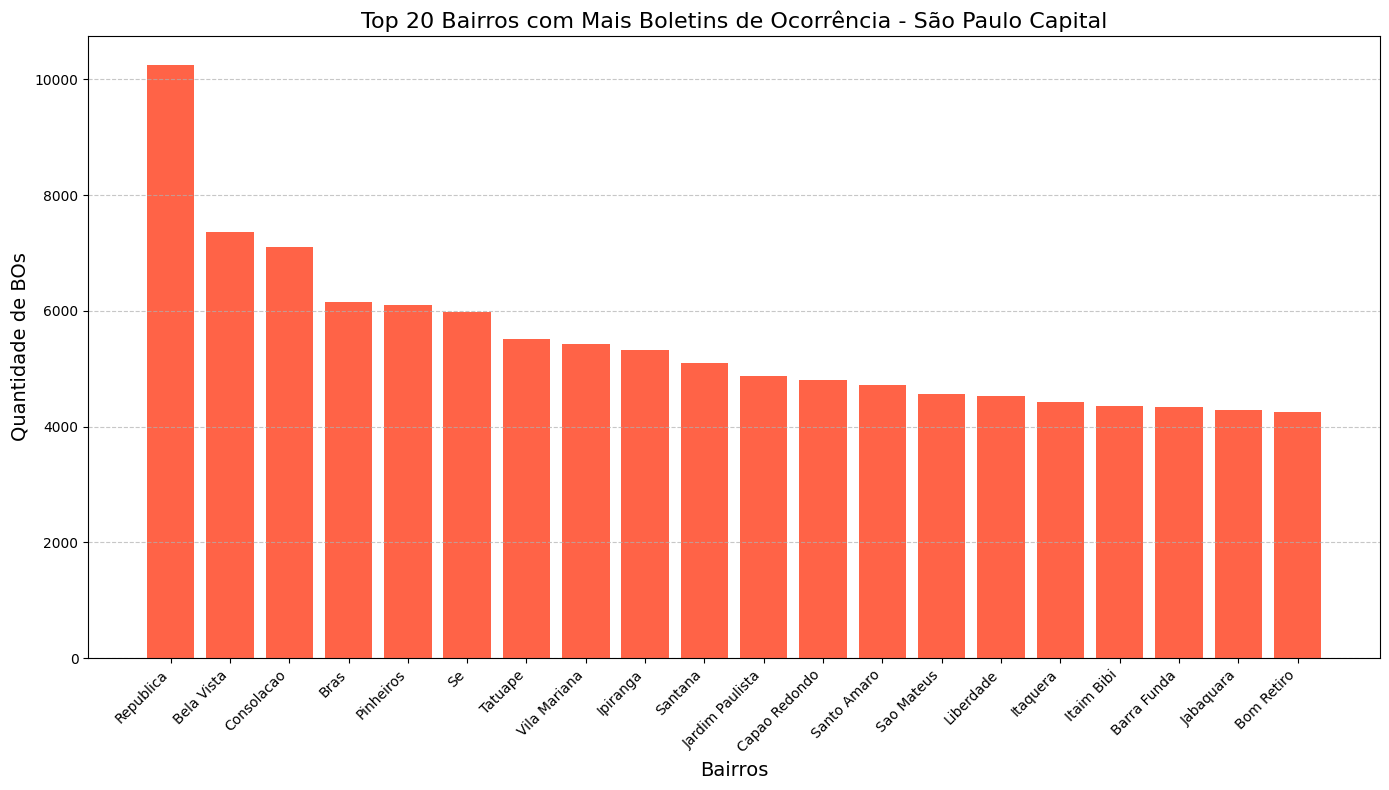

In [ ]:
contagem_bairros = (
    df["BAIRRO_CATEGORIZADO"]
    .value_counts()
    .rename_axis('Bairro')
    .reset_index(name='Total_BOs')
 )
# Filtro para remover "Outro", evitando aparecer no gráfico
contagem_bairros = contagem_bairros[contagem_bairros["Bairro"] != "Outro"]

contagem_bairros = contagem_bairros.sort_values("Total_BOs", ascending=False)
top20_bairros = contagem_bairros.head(20)

print("\nTop 20 Bairros com Mais BOs:")
print(top20_bairros.to_string(index=False))

plt.figure(figsize=(14,8))
plt.bar(top20_bairros["Bairro"], top20_bairros["Total_BOs"], color='tomato')

plt.title("Top 20 Bairros com Mais Boletins de Ocorrência - São Paulo Capital", fontsize=16)
plt.xlabel("Bairros", fontsize=14)
plt.ylabel("Quantidade de BOs", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# Filtrar os registros que foram categorizados como "Outro"
df_outros = df[df["BAIRRO_CATEGORIZADO"] == "Outro"]

# Contar os bairros originais que ficaram como "Outro"
contagem_outros = (
    df_outros["BAIRRO"]
    .value_counts()
    .rename_axis('Bairro_Original')
    .reset_index(name='Total_BOs')
)

# Pegar os 20 bairros "Outro" com mais ocorrências
top20_outros = contagem_outros.head(20)

# Exibir os resultados
print("\nTop 20 Bairros (não mapeados) com Mais Boletins de Ocorrência:")
print(top20_outros.to_string(index=False))


Top 20 Bairros (não mapeados) com Mais Boletins de Ocorrência:
              Bairro_Original  Total_BOs
                       centro      37796
                        rural       7117
                   area rural       4962
                  jd sao luis       2856
                       taboao       2569
                     pirituba       2528
                      cumbica       2509
                jardim colina       2508
centro historico de sao paulo       2190
                     pimentas       2175
               vila ferriello       2094
                   sao miguel       1982
                      caninde       1909
                     pedreira       1869
                      lajeado       1810
               jose bonifacio       1736
                    conceicao       1551
                  rudge ramos       1518
               campos eliseos       1430
                      socorro       1327


Para responder à pergunta sobre quais são os bairros mais perigosos de São Paulo capital (baseando-se na quantidade de Boletins de Ocorrência - BOs registrados), utilizei a coluna BAIRRO_CATEGORIZADO, para poder focar apenas na capital e eliminar qualquer dado que não seja da capital.

Ao observar a categoria "Outro" (bairros não mapeados), ficou evidente que, excetuando bairros como "Centro" (nome comum em muitas cidades) e áreas rurais, a maioria dos bairros fora da capital apresentava um índice de criminalidade muito inferior.

Assim, conclui-se que no estado de São Paulo, de forma geral, a maioria das cidades apresenta uma taxa de criminalidade relativamente baixa, tornando-se locais seguros para visitação. No entanto, como o foco da análise é exclusivamente a cidade de São Paulo, concentrei a avaliação apenas nos bairros categorizados corretamente.

A partir da contagem de ocorrências, observou-se que o bairro República é, disparado, o mais perigoso, seguido por Bela Vista e Consolação. Estes bairros apresentaram o maior número de registros de BOs, indicando serem locais onde a criminalidade é mais presente, e, portanto, talvez devessem ser evitados, principalmente em horários de menor movimento. Em seguida, aparecem Brás, Pinheiros e Sé, também com índices elevados de criminalidade.

É importante destacar que a análise considerou apenas os 20 bairros com maior número de BOs, para focar nos locais mais críticos. Bairros com menos ocorrências, geralmente menores ou mais residenciais, foram excluídos da visualização para não dispersar a análise e manter o foco nas áreas com maior impacto.

## Pergunta 3

3. Quais as cidades mais perigosas do Estado de São Paulo?

## Pergunta 4 (Pedro)

4. Quais as 10 ruas para se evitar de ir no Estado de São Paulo?

O objetivo é descobrir ruas nas quais se devem evitar , levando em conta a quantidade de BOs ocorridos e principalmente o numero de mortes. Para isso, primeriamente foi nescessario filtrar as ruas, usando a coluna LAGRADOURO, foi possivel filtrar aquelas linhas que começavam com a palavra "rua" que são as que serão usadas na analise. (1)

In [ ]:
#Informações sobre a coluna LAGRADOURO (1)
df["LOGRADOURO"].unique()

array(['da vedacao da divulgacao dos dados relativos',
       'praca da bandeira', 'rua prates', ..., 'estrada montreal',
       'estrada dona lagoa grande', 'avenida caetano zamataro'],
      dtype=object)

Após termos as linhas onde BOs ocorreram em ruas, foi preciso filtrar agora as ruas mais perigosas, que na nossa analise foi definida como as ruas com mais mortes por numeros de BOs.  

Para isso criamos variaveis para armazenar as ruas onde ocorreram mortes(2), e assim verificamos a quantidade de mortes em cada rua e tambem a quantidade de BO em cada(3), com isso podemos criar um dataframe com bos e mortes para as 10 ruas mais perigosas(4)

In [ ]:
ruas_selecionadas = df[df["LOGRADOURO"].str.startswith('rua', na=False)] #(1)
ruas_selecionadas_com_vitima = ruas_selecionadas.query("FLAG_VITIMA_FATAL == 'sim'") #(2)

bo_por_rua = ruas_selecionadas.groupby('LOGRADOURO')['NUM_BO'].count() #(3)
bo_por_rua.head(3)
mortes_por_rua = ruas_selecionadas_com_vitima.groupby('LOGRADOURO')['FLAG_VITIMA_FATAL'].count() #(3)
mortes_por_rua.head(3)

df_bo_mortes = pd.DataFrame({ #(4)
    'Numeros_de_BO': bo_por_rua,
    'Numero_de_BO_Com_Mortes': mortes_por_rua
})

df_bo_mortes_sorted = df_bo_mortes.sort_values(by='Numero_de_BO_Com_Mortes', ascending=False).head(10) #Aqui ordenamos pela quantidade BOs de mortes, do mais alto para o mais baixo.

print("Tabela com o número de BOs e número de BOs com mortes por rua: ")
print(df_bo_mortes_sorted)

Tabela com o número de BOs e número de BOs com mortes por rua: 
                          Numeros_de_BO  Numero_de_BO_Com_Mortes
LOGRADOURO                                                      
rua chuva na montanha                98                     76.0
rua padre manoel nunes              133                     48.0
rua henrique sam mindlin            110                     45.0
rua olaria                          116                     36.0
rua jose lins do rego                59                     32.0
rua tres arapongas                  145                     32.0
rua cinco                           128                     28.0
rua dos pedreiros                    83                     27.0
rua vista alegre                     70                     26.0
rua jose pistelli                    35                     24.0


Aqui calculamos,as 10 ruas com maior taxa de mortalidade por numero de BO, ou de se teve um BO ter uma morte. Para termos uma ideia melhor, pegamos apenas ruas, onde tiveram pelo menos, 10 BOs registrados.

In [ ]:
df_bo_mortes['Taxa_Mortes_por_BO'] = df_bo_mortes['Numero_de_BO_Com_Mortes'] / df_bo_mortes['Numeros_de_BO'] #Calcula a taxa
df_bo_mortes_filtrado = df_bo_mortes[df_bo_mortes['Numeros_de_BO'] >= 10] #Filtra para ruas que tenham pelo menos 5 BOs

# Ordena pelas maiores taxas
ruas_por_taxa = df_bo_mortes_filtrado.sort_values(by='Taxa_Mortes_por_BO', ascending=False).head(10)
ruas_por_taxa



,Numeros_de_BO,Numero_de_BO_Com_Mortes,Taxa_Mortes_por_BO
LOGRADOURO,,,
rua carlos augusto brasao,29,24.0,0.827586
rua chuva na montanha,98,76.0,0.775510
rua luiz rubino,21,16.0,0.761905
rua jose pistelli,35,24.0,0.685714
rua capitao antonio joaquim do carmo,16,10.0,0.625000
rua cananga do japao,13,8.0,0.615385
rua jose lemes de moraes,13,8.0,0.615385
rua major marcelino,13,8.0,0.615385
rua francisco luz,10,6.0,0.600000


Aqui temos um grafico que mostra as 10 ruas com mais mortes


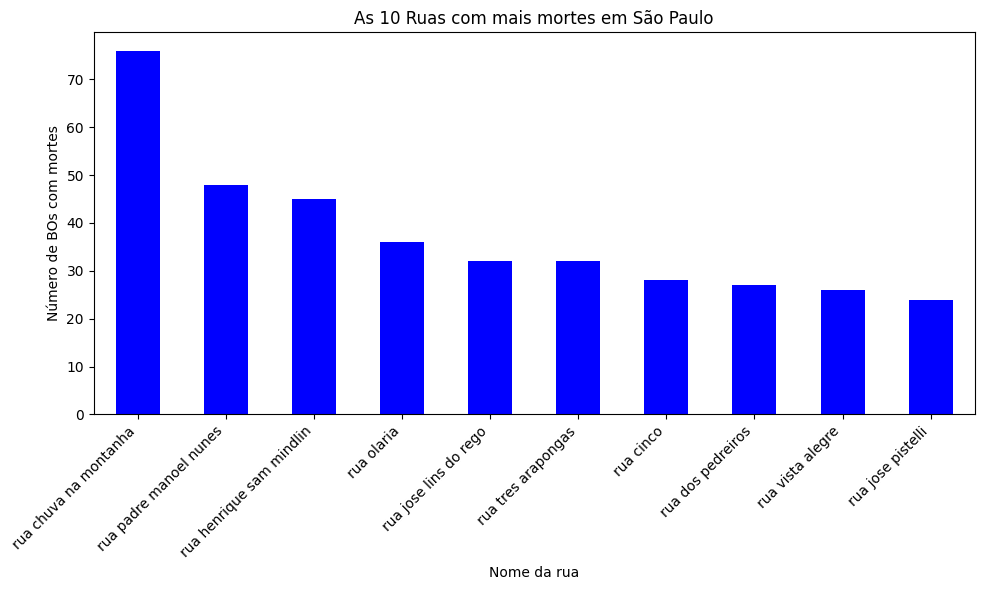

In [ ]:
plt.figure(figsize=(10, 6))
mortes_por_rua.sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.title('As 10 Ruas com mais mortes em São Paulo')
plt.xlabel('Nome da rua')
plt.ylabel('Número de BOs com mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Aqui um Grafico(Quantidade per Rua) dos numeros de BOs e Numero de  BOs com Mortes, para termos uma noção da proporção, e podemos ver que há bairros onde o numero de bos que tiveram mortes, são quase  
iguais ao numero total de BOs.

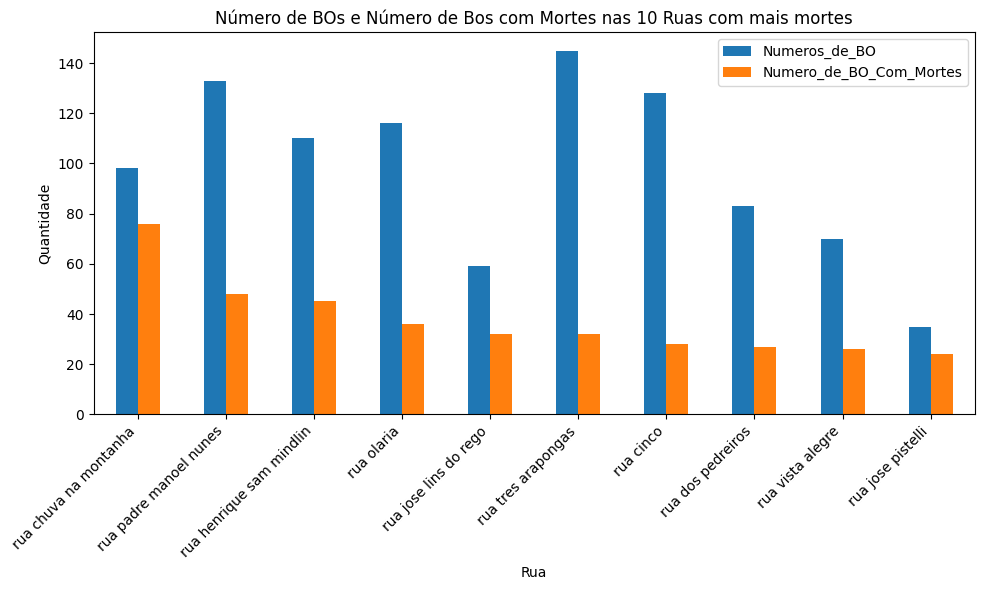

In [ ]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando o número de mortes e BOs nas 10 ruas mais perigosas
df_bo_mortes_sorted[['Numeros_de_BO', 'Numero_de_BO_Com_Mortes']].plot(kind='bar', ax=ax)

# Adicionando título e rótulos
plt.title('Número de BOs e Número de Bos com Mortes nas 10 Ruas com mais mortes')
plt.xlabel('Rua')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Grafico com as 10 ruas, que tem a maior taxa de mortalidade por BO


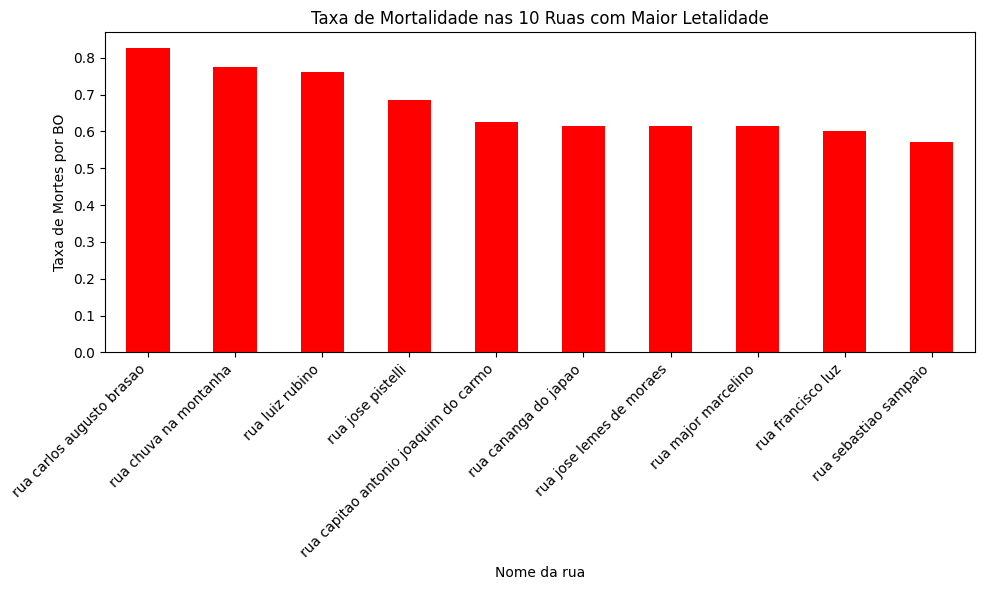

In [ ]:
plt.figure(figsize=(10, 6))
ruas_por_taxa['Taxa_Mortes_por_BO'].plot(kind='bar', color='red')
plt.title('Taxa de Mortalidade nas 10 Ruas com Maior Letalidade')
plt.xlabel('Nome da rua')
plt.ylabel('Taxa de Mortes por BO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Com isso chegamos nas 10 ruas mais perigosas,do estado de São Paulo, cada uma com uma taxa maior 60% de morte_per_BO:
ruas_por_taxa #Para mostrar quais sao as 10 ruas

,Numeros_de_BO,Numero_de_BO_Com_Mortes,Taxa_Mortes_por_BO
LOGRADOURO,,,
rua carlos augusto brasao,29,24.0,0.827586
rua chuva na montanha,98,76.0,0.775510
rua luiz rubino,21,16.0,0.761905
rua jose pistelli,35,24.0,0.685714
rua capitao antonio joaquim do carmo,16,10.0,0.625000
rua cananga do japao,13,8.0,0.615385
rua jose lemes de moraes,13,8.0,0.615385
rua major marcelino,13,8.0,0.615385
rua francisco luz,10,6.0,0.600000


## Pergunta 5 (Tiago)

-5. Quero alugar um veiculo para rodar, quais deveria evitar? (por terem maior quantidade de BOs envolvidos, moto ou carro?)

O objetivo é descobrir quais veículos deveria evitar de alugar em São Paulo, pois esses estão envolvidos em uma quantia maior de BO's.  
Para começar, primeiro foi necessário normalizar a grafia do nome das marcas escolhidas (Fiat, Chevrolet, Volkswagen), para que possamos trabalhar com elas.

In [ ]:
# Corrigir grafia incorreta do nome das marcas escolhidas: Fiat, Chevrolet, Volkswagen
df['MARCA_VEICULO'] = df['MARCA_VEICULO'].replace({
    'fiat uno 1.6': 'fiat',
    'ifiat uno mille ep': 'fiat',
    'mobby': 'fiat'
})

df['MARCA_VEICULO'] = df['MARCA_VEICULO'].replace({
    'gm': 'chevrolet',
    'chev': 'chevrolet',
    'chevrolt': 'chevrolet'
})

df['MARCA_VEICULO'] = df['MARCA_VEICULO'].replace({
    'vw': 'volkswagen',
    'volkswagem': 'volkswagen',
    'volkwagen': 'volkswagen'
})

# Visualizar todos os modelos das 3 marcas escolhidas
# df_modelos_carros = pd.DataFrame(
#     df[df['MARCA_VEICULO'].isin(['fiat', 'chevrolet', 'volkswagen'])]['MODELO_VEICULO'].unique(),
#     columns=['MODELO_VEICULO']
# )
# print(df_modelos_carros)

Também precisamos filtrar apenas os veículos das marcas que vamos usar no teste.

In [ ]:
marcas_interesse = ['chevrolet', 'fiat', 'volkswagen']
df_filtrado = df[df['MARCA_VEICULO'].isin(marcas_interesse)].copy()

Como nos foi recomendado na primeira entrevista, optamos por classificar o modelo do carro por um modelo base (mesmo que isso enviese um pouco, pois um 1.0 e um 1.5 pode sim fazer diferença), pois isso facilitaria para passar o ponto que queremos provar.
Aproveitamos para criar a nova coluna de modelos base também.

In [ ]:
def extrair_modelo_base(modelo):
    return str(modelo).split()[0].lower()

#Cria nova coluna
df_filtrado['MODELO_BASE'] = df_filtrado['MODELO_VEICULO'].apply(extrair_modelo_base)


Para fins de melhor visibilidade e representatividade, também separamos esses modelos bases nos 10 com mais ocorrência de cada marca.

In [ ]:
modelos_fiat = df_filtrado[df_filtrado['MARCA_VEICULO'] == 'fiat']['MODELO_BASE'].value_counts().head(10)
modelos_chevrolet = df_filtrado[df_filtrado['MARCA_VEICULO'] == 'chevrolet']['MODELO_BASE'].value_counts().head(10)
modelos_volkswagen = df_filtrado[df_filtrado['MARCA_VEICULO'] == 'volkswagen']['MODELO_BASE'].value_counts().head(10)



E então partimos para a geração dos gráficos. Começando por: Os 10 modelos mais roubados da Fiat.

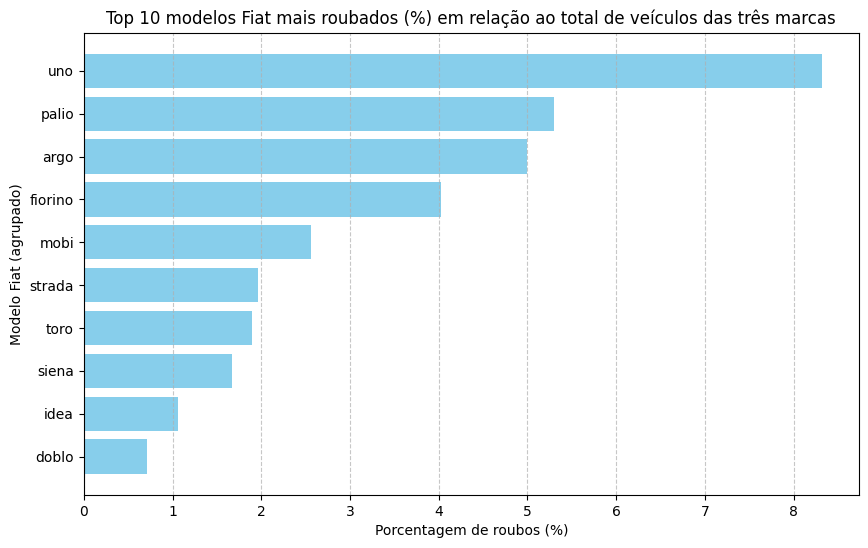

In [ ]:
# Construção dos gráficos
total_geral = df_filtrado.shape[0]


# -------- Fiat --------
porcentagem_fiat = (modelos_fiat / total_geral) * 100

plt.figure(figsize=(10, 6))
plt.barh(porcentagem_fiat.index, porcentagem_fiat.values, color='skyblue')
plt.xlabel('Porcentagem de roubos (%)')
plt.ylabel('Modelo Fiat (agrupado)')
plt.title('Top 10 modelos Fiat mais roubados (%) em relação ao total de veículos das três marcas')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Os 10 modelos mais roubados da Chevrolet:

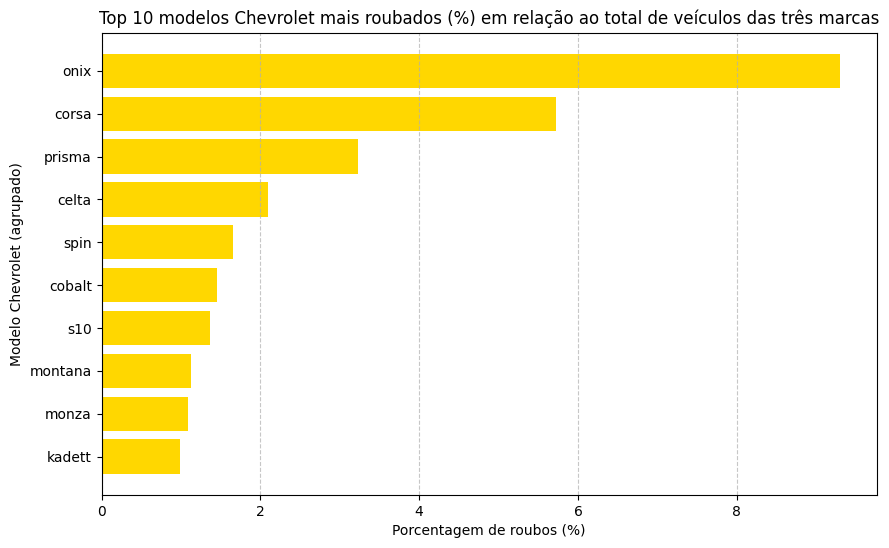

In [ ]:
# -------- Chevrolet --------
porcentagem_chevrolet = (modelos_chevrolet / total_geral) * 100

plt.figure(figsize=(10, 6))
plt.barh(porcentagem_chevrolet.index, porcentagem_chevrolet.values, color='gold')
plt.xlabel('Porcentagem de roubos (%)')
plt.ylabel('Modelo Chevrolet (agrupado)')
plt.title('Top 10 modelos Chevrolet mais roubados (%) em relação ao total de veículos das três marcas')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

E os 10 modelos mais roubados da Volkswagem:

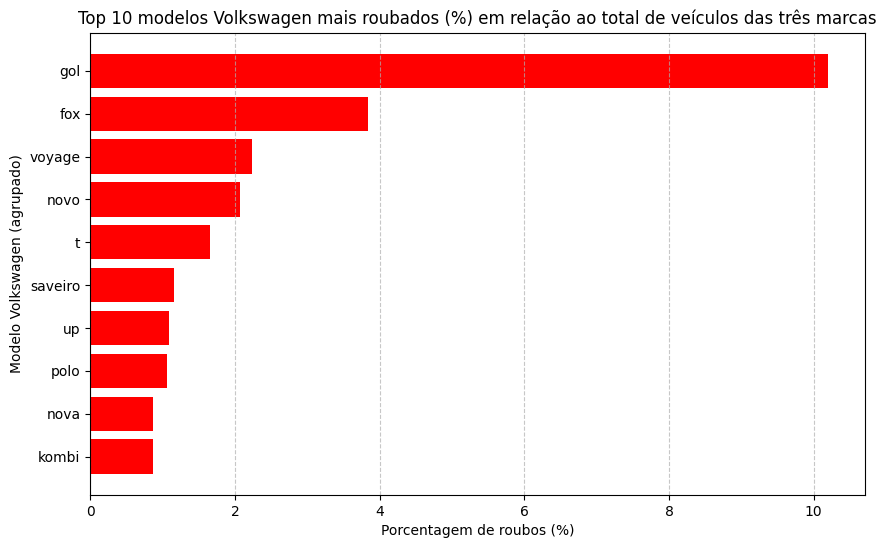

In [ ]:
# -------- Volkswagen --------
porcentagem_volkswagen = (modelos_volkswagen / total_geral) * 100

plt.figure(figsize=(10, 6))
plt.barh(porcentagem_volkswagen.index, porcentagem_volkswagen.values, color='red')
plt.xlabel('Porcentagem de roubos (%)')
plt.ylabel('Modelo Volkswagen (agrupado)')
plt.title('Top 10 modelos Volkswagen mais roubados (%) em relação ao total de veículos das três marcas')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Uma coisa importante que foi alterada: inicialmente a contagem de roubos ou furtos era quantitativa. Isso enviesava os resultados, pois veiculos muito caros ou raros estavam sendo dados como mais seguros, quando na verdade eles apenas eram uma quantidade muito menor.

Na nova abordagem foi acrescentada a ideia de porcentagem para corrigir esse vies.
Sabemos que ainda está parcialmente enviesado, afinal só escolhemos 3 marcas de carros. Porém, essas 3 são as mais populares, assim o aluguel será mais barato.
Para isso, foi feito o tratamento das grafias incorretas referente a marca dos carros
(por ex: vw = volkswagen, gm = chevrolet)
Por fim o gráfico com a relação modelo x porcentagem dos roubos (baseado em cada marca)

Com isso chegamos algumas conclusões.
Sobre os carros da fiat:

- Evitar o argo, que foi disparado o que teve mais ocorrencias;

- Uno aparenta ser uma boa opção, mas na verdade ele aparece em diferentes modelos, chegando a um somatorio de aproximadamente 3% entre os fiats mais visados;

- Uma boa escolha seria o palio economy;

Sobre os carros da chevrolet:

- O corsa é sim um carro bastante visado, evitar;

- Há praticamente só modelos de onix, chegando este a um somatorio de aproximadamente 6% entre os chevrolets com mais ocorrencias. O que o torna bem mais perigoso que o corsa.

Sobre os carros da volkswagen:

- O gol aparece em diversos modelos, alcançando um somatório de aprox. 5%

- O fox também, alcançando um sumatório de aprox. 2%

- Uma boa opção para se alugar (e divertida, pois caberia vários amigos) seria uma kombi.

## Pergunta 6 (Tiago e Ayko)

-6. Ha uma relacao com a idade do carro e probabilidade de roubo?

Com a analise da pergunta 5, ficamos tentados a alugar uma Kombi, mas sera que, por ser um carro mais antigo, ele esta mais suscetivel a ser roubado?
Iremos usar inferencia estatistica e nivel de significancia para abordar tal estudo.

Dado da populacao: a idade media da frota no brasil é de 10,7 anos (estudo realizado em 2023), segundo o Sindicato Nacional da Indústria de Componentes para Veículos Automotores (Sindipeças).
Dado da amostra: idade media da frota de SP

H0 (Hipótese Nula): A idade média dos carros roubados em SP não é diferente da idade média da frota nacional (10 anos)
H1 (Hipótese Alternativa): A idade média dos carros roubados em SP é diferente da idade média da frota nacional

Então, primeiro vamos criar o campo IDADE_FABRICAÇAO, que será utilizado para provar nosso ponto. Que basicamente é uma subtração do ano do banco de dados (2022) pelo ano de abricação do carro.

In [ ]:
df['IDADE_FABRICACAO'] = 2022 - df['ANO_FABRICACAO']

Daí, filtramos os registros dos BO's que possuem ano de fabricação, ou seja, que tem veículo envolvido.

In [ ]:
anos_invalidos = [0, 95, 200, 202, 1111]

df_carros = df[
    df['ANO_FABRICACAO'].notnull() &  # remove NaN
    (~df['ANO_FABRICACAO'].isin(anos_invalidos))  # remove anos inválidos
].copy()

Com isso, podemos partir para alguns dados. Primeiro, vamos para os dados das amostras que conseguimos:

In [ ]:
total_amostra = len(df_carros)
media_amostra = df_carros['IDADE_FABRICACAO'].mean()
desvio_padrao_amostra = df_carros['IDADE_FABRICACAO'].std()

E alguns dados da população, como a média da idade da frota de carros do Brail (que conseguimos por meio de uma reportagem de uma pesquisa do IBGE, publicado pela Sindipeças) e também seu respectivo desvio padrão e erro padrão.

In [ ]:
media_populacao = 10.7
desvio_padrao_populacao = 4.5
erro_padrao = desvio_padrao_populacao / np.sqrt(total_amostra)

E então partimos para os cálculos do z-score, p-value (que nesse caso será bicaudal) e a partir disso, a definição de seu nível de significãncia.

In [ ]:
z_score = (media_amostra - media_populacao) / erro_padrao

p_valor = 2 * (1 - stats.norm.cdf(abs(z_score)))

alpha = 0.05

Estruturação de toda essa análise

In [ ]:
print(f"Análise de Inferência Estatística: Idade dos Carros Roubados")
print(f"----------------------------------------------------------")
print(f"Hipótese Nula (H0): A idade média dos carros roubados em SP não é diferente da idade média da frota nacional (10 anos)")
print(f"Hipótese Alternativa (H1): A idade média dos carros roubados em SP é diferente da idade média da frota nacional")
print(f"\nEstatísticas da Amostra (Carros Roubados em SP):")
print(f"Total de veículos com ano de fabricação registrado: {total_amostra}")
print(f"Idade média dos veículos: {media_amostra:.2f} anos")
print(f"Desvio padrão da amostra: {desvio_padrao_amostra:.2f}")
print(f"\nEstatísticas da População (Frota Nacional):")
print(f"Idade média da frota nacional: {media_populacao:.2f} anos")
print(f"Desvio padrão estimado: {desvio_padrao_populacao:.2f}")
print(f"\nResultados do Teste:")
print(f"Erro padrão: {erro_padrao:.4f}")
print(f"Estatística Z: {z_score:.4f}")
print(f"P-valor: {p_valor:.4f}")
print(f"Nível de significância: {alpha:.2f}")


Análise de Inferência Estatística: Idade dos Carros Roubados
----------------------------------------------------------
Hipótese Nula (H0): A idade média dos carros roubados em SP não é diferente da idade média da frota nacional (10 anos)
Hipótese Alternativa (H1): A idade média dos carros roubados em SP é diferente da idade média da frota nacional

Estatísticas da Amostra (Carros Roubados em SP):
Total de veículos com ano de fabricação registrado: 250657
Idade média dos veículos: 9.25 anos
Desvio padrão da amostra: 8.43

Estatísticas da População (Frota Nacional):
Idade média da frota nacional: 10.70 anos
Desvio padrão estimado: 4.50

Resultados do Teste:
Erro padrão: 0.0090


Visualização dos resultados em gráfico:

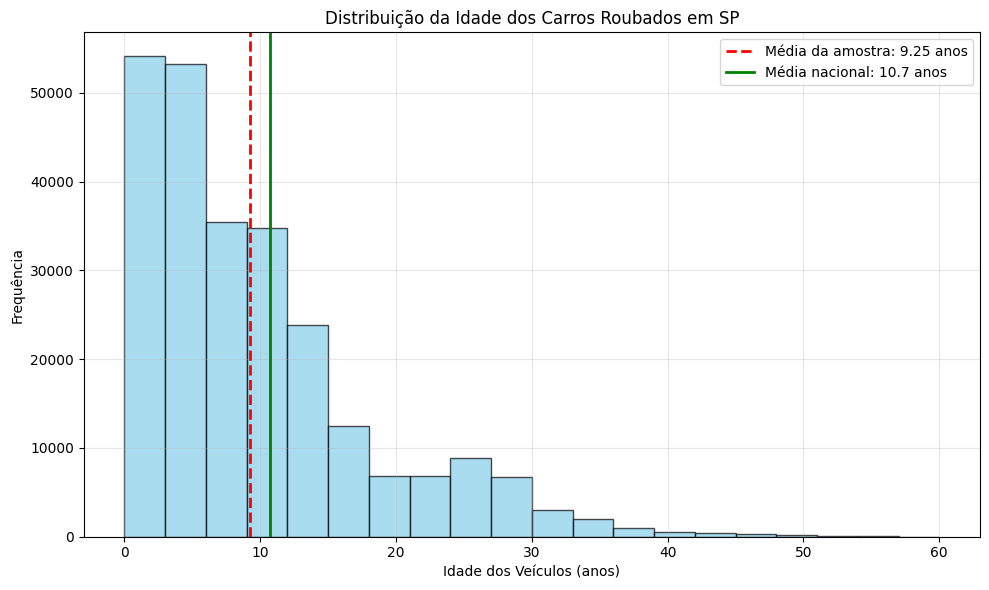

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_carros['IDADE_FABRICACAO'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=media_amostra, color='red', linestyle='--', linewidth=2, label=f'Média da amostra: {media_amostra:.2f} anos')
plt.axvline(x=media_populacao, color='green', linestyle='-', linewidth=2, label=f'Média nacional: {media_populacao} anos')
plt.xlabel('Idade dos Veículos (anos)')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade dos Carros Roubados em SP')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Como o p-valor (0.0000) é menor que o nível de significância (0.05), rejeitamos a hipótese nula.

Concluímos que a idade média dos carros roubados em SP é diferente da idade média da frota nacional.
No entanto, isso favorece nossa escolha da Kombi: por se tratar de um carro mais antigo, ela não é o principal alvo dos assaltantes.

## Pergunta 7 (Pedro)


7. A chance de uma pessoa ser roubada é maior no periodo noturno (noite e madrugada)?

Para podermos responder essa pergunta, iremos utilizar a inferência estatística.   

Para pordemos ter uma noção se a noite é mais perigoso que em outros horários, tentaremos rejeitar á seguinte hipotese nula:   
H0 = "A quantidade de roubos|Furtos no período noturno é igual à dos outros períodos"   
E a hipotese Alternativa:   
H1 = "A quantidade de roubos|Furtos é maior no período noturno do que em outros períodos"

Para calcularmos as proporções da noite e dos outros periodos, primeiramente precisaremos, filtrar de todos os crimes, aqueles que se enquadram ou em Roubo ou em Furto (1).

OBS:Para a analise iremos desconsiderar roubos e furtos que aconteceram em horas incertas (2).

In [ ]:
# Máscara 1: contém 'roubo' ou 'furto'
mask_rf = df['NATUREZA_APURADA'].str.contains('roubo|furto', na=False)

# Máscara 2: período válido (não nulo e não incerto)
mask_periodo = df['PERIODO_OCORRENCIA'].notna() & ~df['PERIODO_OCORRENCIA'].str.contains('em hora incerta', na=False)

# Combina as duas condições
df_roubo_furto = df[mask_rf & mask_periodo]

In [ ]:
print(df['PERIODO_OCORRENCIA'].unique()) #Para podermos ter ciencia de cada tipo de periodo.
roubo_furto = df['NATUREZA_APURADA'].str.contains('roubo|furto', na=False)#(1)
# (2) aqui removemos valores nulos e horas incertas
periodo = df['PERIODO_OCORRENCIA'].notna() & ~df['PERIODO_OCORRENCIA'].str.contains('em hora incerta', na=False)
df_roubo_furto = df[roubo_furto & periodo]
print(df_roubo_furto)

O proximo passo é calculas as proporções:  

In [ ]:
noturno = df_roubo_furto[df_roubo_furto['PERIODO_OCORRENCIA'].isin(['a noite', 'de madrugada'])].shape[0] #Roubos|noturnos no horario norturno
outros_horarios = df_roubo_furto[~df_roubo_furto['PERIODO_OCORRENCIA'].isin(['a noite', 'de madrugada'])].shape[0] #Roubos|Furtos que não sao no horario norturnos
total = outros_horarios + noturno #Total de roubos|furtos, obtido da soma de todos os horarios.

Agora para calcularmos o p valor, e ver se a hipotese pode ser rejeitada, usaremos um teste binominal, para calcular se a proporção de roubos|furtos no periodo noturno é significamente maior que 50% de todos os roubos|furtos.

In [ ]:
p_valor = binomtest(noturno, n=total, p=0.5, alternative='greater')

print(f'Roubos em horários noturnos: {noturno}')
print(f'Roubos em outros períodos: {outros_horarios}')
print(f'Total: {total}')
print(f'p-valor: {p_valor.pvalue:.5f}')


Roubos em horários noturnos: 275090
Roubos em outros períodos: 238433
Total: 513523
p-valor: 0.00000


Com esse resultado para o valor p, podemos rejeitar a hipotese nula, e responder com certa segurança que a chance de acontecer um roubo no periodo noturno é maior do que em outros horários.

## Pergunta 8 (Rafael)

8. Quais os tipos de crime que os idosos mais sofrem?

In [ ]:
df_idosos = df[(df['IDADE_PESSOA'] >= 60) & (df['IDADE_PESSOA'].notna())]

top_crimes_idosos = df_idosos['NATUREZA_APURADA'].value_counts(normalize=True).head(10)

analise_idosos = []
for crime, porcentagem in top_crimes_idosos.items():
    subset = df_idosos[df_idosos['NATUREZA_APURADA'] == crime]

    total_crime = df[df['NATUREZA_APURADA'] == crime].shape[0]  # Total geral do crime
    percent_idosos = (subset.shape[0] / total_crime * 100) if total_crime > 0 else 0

    genero = subset['SEXO_PESSOA'].value_counts(normalize=True).idxmax()

    analise_idosos.append({
        'Crime': crime,
        '% entre Idosos': f"{porcentagem*100:.1f}%",
        'Participação no Total do Crime': f"{percent_idosos:.1f}%",
        'Gênero Mais Afetado': genero,
        'Casos (60+)': subset.shape[0]
    })

df_resultado_idosos = pd.DataFrame(analise_idosos)
print("\nPrincipais Crimes Contra Idosos (60+ anos):")
print(df_resultado_idosos.to_string(index=False))

Ao identificar os crimes através da NATUREZA_APURADA, notei que morte suspeita é a maior frequencia cometida contra idosos (96.8%), e que ainda possui uma alta participação em todo o panorama do crime relacionado a morte suspeita, que contabiliza a participação em (41.8%) ao analisarmos todas as idades.

Além disso, crimes como latrocínio (roubo seguido de morte) e lesão corporal seguida de morte têm baixa frequência entre idosos, mas os idosos representam uma parcela significativa do total geral desses crimes (20,3% e 9,8% respectivamente).

A grande maioria dos crimes tem como gênero mais afetado o masculino, exceto o roubo residencial, onde o feminino predomina, o que possivelmente seja pela maior presença em casa.

In [ ]:
df_resultado_idosos['%_participacao_float'] = df_resultado_idosos['Participação no Total do Crime'].str.replace('%', '').astype(float)

#Calcular média
media_participacao = df_resultado_idosos['%_participacao_float'].mean()

print(f"Média da participação dos idosos nos crimes analisados: {media_participacao:.2f}%")


Média da participação dos idosos nos crimes analisados: 8.03%


Em média, os idosos representam cerca de 8% dos casos dos crimes listados. Apesar de alguns crimes específicos terem índices mais altos, o valor médio reforça que em geral os idosos não são o grupo mais afetado — com exceção notável da 'morte suspeita'.

## Pergunta 9  (Pedro)


9.Quais padrões temporais existem nos tipos de crimes? (Aprendizado Não Supervisionado)


Para começar iremos fazer o Pré-processamento dos Dados:
Seleção de Colunas,Conversão de Hora(HORA_OCORRENCIA), Codificação Categórica e Remoção de Nulos

In [33]:
dfns = df_tratado.copy()

# Colunas de interesse para padrões temporais
colunas = ['HORA_OCORRENCIA', 'PERIODO_OCORRENCIA', 'NATUREZA_APURADA', 'ESPECIE']

# Converter hora para número
dfns['HORA_OCORRENCIA'] = pd.to_datetime(dfns['HORA_OCORRENCIA'], errors='coerce').dt.hour

# Codificar variáveis categóricas
for col in colunas:
    if dfns[col].dtype == 'object' or dfns[col].dtype.name == 'category':
        dfns[col] = dfns[col].astype('category').cat.codes

# Remover linhas com valores ausentes e criar o DataFrame final para clustering
df_cluster = dfns[colunas].dropna()

/tmp/ipython-input-33-2091514556.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfns['HORA_OCORRENCIA'] = pd.to_datetime(dfns['HORA_OCORRENCIA'], errors='coerce').dt.hour


Para o proximo passo iremos padronizar os dados

In [35]:
scaler = StandardScaler()
dados_escalados = scaler.fit_transform(df_cluster)

Agora aplicamos o algoritmo de clustering K-Means.

Informamos ao algoritmo que queremos que ele encontre 4 grupos distintos nos dados.

Treina o modelo com os dados normalizados e atribui a cada linha (ocorrência) um rótulo de cluster (de 0 a 3). Esse resultado é salvo em uma nova coluna chamada cluster.

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_cluster['cluster'] = kmeans.fit_predict(dados_escalados)

Visualização:
Nossos dados clusterizados têm 4 dimensões (uma para cada coluna que usamos), o que é impossível de visualizar em um gráfico 2D. Para resolver isso, usamos a Análise de Componentes Principais (PCA), uma técnica que reduz as 4 dimensões para apenas 2 ("componentes principais"), tentando preservar o máximo de informação possível.

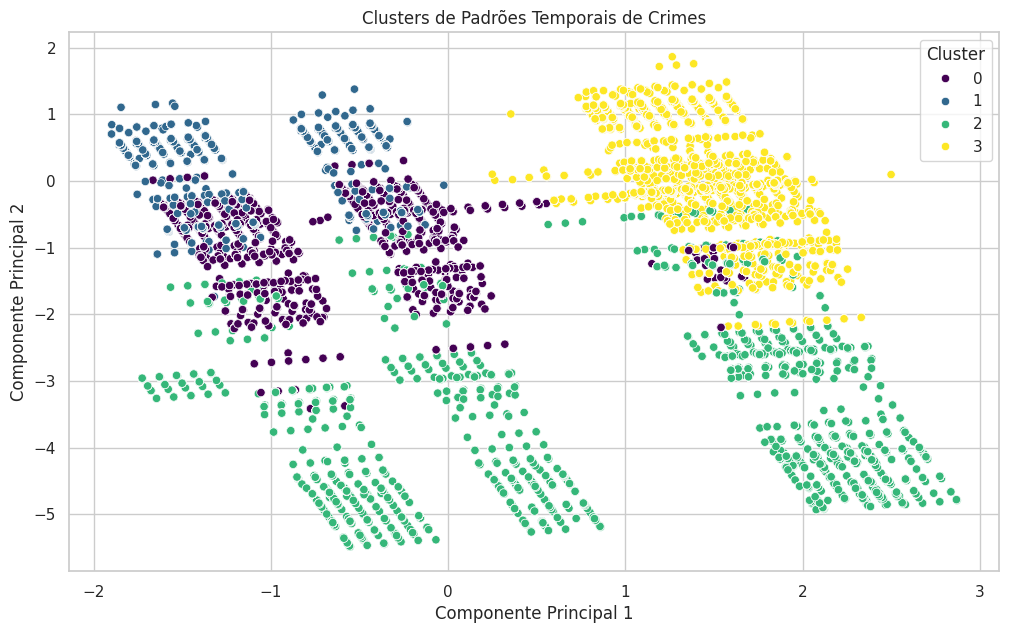

In [37]:
# Redução de dimensionalidade com PCA para visualização 2D
pca = PCA(n_components=2)
pontos_2d = pca.fit_transform(dados_escalados)
df_cluster['pca1'] = pontos_2d[:, 0]
df_cluster['pca2'] = pontos_2d[:, 1]

# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Clusters de Padrões Temporais de Crimes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Análise e Perfilamento dos Clusters:
Com o grafico anterior sabemos o que os grupos  existem mas nao o que significam, vamos analisar os perfis de cada grupo.


In [39]:
# Juntar os resultados do cluster com os dados originais para interpretação
df_perfil = df_tratado.loc[df_cluster.index].copy()
df_perfil['cluster'] = df_cluster['cluster']

print("Analisando o perfil dos clusters encontrados...")

# Analisar e imprimir as características de cada cluster
for cluster_id in sorted(df_perfil['cluster'].unique()):
    print(f"\n--- Perfil do Cluster {cluster_id} ---")
    cluster_data = df_perfil[df_perfil['cluster'] == cluster_id]

    hora_media = pd.to_datetime(cluster_data['HORA_OCORRENCIA'], format='%H:%M:%S', errors='coerce').dt.hour.mean()

    # Encontrar o valor mais comum (moda) para as colunas categóricas
    periodo_comum = cluster_data['PERIODO_OCORRENCIA'].mode()[0]
    natureza_comum = cluster_data['NATUREZA_APURADA'].mode()[0]
    especie_comum = cluster_data['ESPECIE'].mode()[0]

    print(f"  - Hora Média da Ocorrência: {hora_media:.2f}")
    print(f"  - Período Mais Comum: {periodo_comum}")
    print(f"  - Natureza do Crime Mais Comum: {natureza_comum}")
    print(f"  - Espécie de Bem Mais Comum: {especie_comum}")
    print(f"  - Número de Ocorrências no Cluster: {len(cluster_data)}")

Analisando o perfil dos clusters encontrados...

--- Perfil do Cluster 0 ---
  - Hora Média da Ocorrência: 17.78
  - Período Mais Comum: a noite
  - Natureza do Crime Mais Comum: furto (art. 155) - veiculo
  - Espécie de Bem Mais Comum: titulo ii - patrimonio (arts. 155 a 183)
  - Número de Ocorrências no Cluster: 101222

--- Perfil do Cluster 1 ---
  - Hora Média da Ocorrência: 18.83
  - Período Mais Comum: a noite
  - Natureza do Crime Mais Comum: roubo (art. 157) - veiculo
  - Espécie de Bem Mais Comum: titulo ii - patrimonio (arts. 155 a 183)
  - Número de Ocorrências no Cluster: 197505

--- Perfil do Cluster 2 ---
  - Hora Média da Ocorrência: 12.48
  - Período Mais Comum: pela manha
  - Natureza do Crime Mais Comum: morte suspeita
  - Espécie de Bem Mais Comum: ato infracional
  - Número de Ocorrências no Cluster: 39067

--- Perfil do Cluster 3 ---
  - Hora Média da Ocorrência: 5.82
  - Período Mais Comum: pela manha
  - Natureza do Crime Mais Comum: furto (art. 155) - veiculo
  

A análise de clustering revelou com sucesso que existem padrões temporais claros e distintos nos tipos de crimes. O modelo não apenas separou crimes patrimoniais de crimes mais perigosos, mas também fez uma distinção dentro dos crimes patrimoniais, separando os furtos (que ocorrem na madrugada e no fim de tarde) dos roubos (que se concentram no início da noite).

## Pergunta 10


10. Qual a relação entre o local do crime e o tipo de crime cometido?

## Pergunta 11

11. Qual a relação entre o local do crime e a taxa de solução do crime?

## Pergunta 12 (Rafael e Ayko)

12. O dia da semana tem haver com a quantidade de certo tipo de crime?

Para responder essa associação, vamos pegar os dados presente no campo DATA_OCORRENCIA, e extrair o dia da semana a partir dele, e através disso analisarmos cada dia da semana.

In [ ]:
transacoes = []

for _, row in df.iterrows():
    transacao = []
    transacao.append(f"DIA_{row['DIA_SEMANA']}")
    transacao.append(f"CRIME_{row['NATUREZA_APURADA']}")
    transacoes.append(transacao)

# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transacoes).transform(transacoes)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Geração de regras
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filtro: apenas regras onde antecedente é DIA_ e consequente é CRIME_
def regra_valida(row):
    antecedente_ok = all(item.startswith("DIA_") for item in row["antecedents"])
    consequente_ok = all(item.startswith("CRIME_") for item in row["consequents"])
    return antecedente_ok and consequente_ok

# Aplicar filtro
rules = rules[rules.apply(regra_valida, axis=1)]

# Filtrar por confiança mínima
filtered_rules = rules[rules["confidence"] >= 0.1]

# Criar descrição das regras
def regra_em_texto(row):
    antecedente = ", ".join([item.replace("_", " ").title() for item in row["antecedents"]])
    consequente = ", ".join([item.replace("_", " ").title() for item in row["consequents"]])
    return f"Se {antecedente} → então {consequente} (Confiança: {row['confidence']:.2f}, Lift: {row['lift']:.2f})"



Essa parte é responsável por coletar as informações DIA_SEMANA e NATUREZA_APURADA, e também é responsável por começar a criar as regras de associação.

<ipython-input-40-23ad773cba0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules["descricao_regra"] = filtered_rules.apply(regra_em_texto, axis=1)
<ipython-input-40-23ad773cba0c>:13: UserWarning: Glyph 29562 (\N{CJK UNIFIED IDEOGRAPH-737A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-23ad773cba0c>:13: UserWarning: Glyph 30303 (\N{CJK UNIFIED IDEOGRAPH-765F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29562 (\N{CJK UNIFIED IDEOGRAPH-737A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph

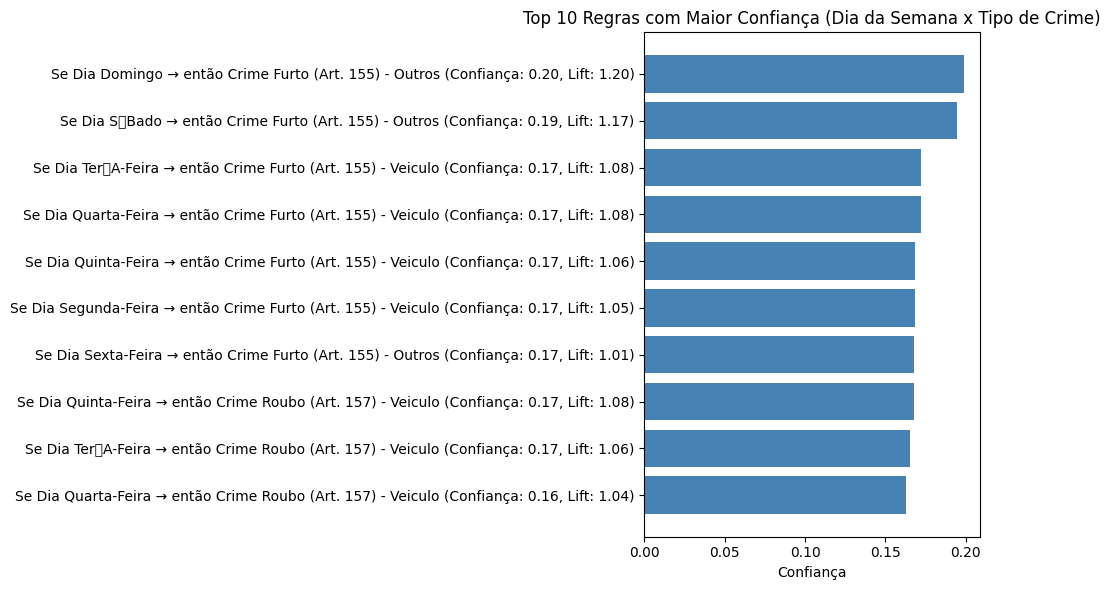

In [ ]:
filtered_rules["descricao_regra"] = filtered_rules.apply(regra_em_texto, axis=1)

colunas_simplificadas = filtered_rules[["descricao_regra", "support", "confidence", "lift"]]
colunas_simplificadas = colunas_simplificadas.sort_values(by="confidence", ascending=False)

# Gráfico com as 10 regras com maior confiança
top10 = colunas_simplificadas.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10["descricao_regra"], top10["confidence"], color='steelblue')
plt.xlabel("Confiança")
plt.title("Top 10 Regras com Maior Confiança (Dia da Semana x Tipo de Crime)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A escolha do suporte a 1% foi feito devido ao tamanho da amostra, crimes são poucos frequentes em comparação a por exemplo, compras de um supermecado.
A escolha da confiança a 10% foi feita pois:
Em dados de criminalidade, associações raramente são muito fortes.

Como por exemplo, se "Domingo" está associada a "Crime Furto" com confiança de 20%, isso já sugere uma tendência relevante para análise.

É interessante observar que em todos esses casos no gráfico, o lift veio acima de 1, indicando uma associação positiva.

Portanto, ao observarmos o gráfico, percebemos que:

Aos domingos, 20% dos crimes são furtos, e O lift de 1.2 indica que a ocorrência de furtos é 20% mais provável aos domingos do que em outros dias, e assim por diante...

Portanto, podemos ver que o dia da semana pode ter grande possibilidade de estar associado a algum crime específico.

## Pergunta 13 (Pedro)
13. Tem como prever a idade da pessoa envolvida em um BO, com os outros dados contidos em um boletim?  
Regressão Linear




Para iniciar essa analise, precisamos definir nossas variaveis, tanto a alvo (Y), como a(s) preditoria(s).  
Como variavel alvo sera usado IDADE_PESSOA pois é um atributo numerico, continuo e para o qual é possivel relacionar com varios outros atributos, e para tentar prevermos a idade de uma pessoa, usaremos como base as variaveis preditorias

Primeiramente filtramos o dataframe e removemos entradas NaNs nas colunas


In [16]:
df_filtered = df.dropna(subset=['NATUREZA_APURADA', 'IDADE_PESSOA', 'TIPO_LOCAL'])
df_filtered = df_filtered[df_filtered['IDADE_PESSOA'] > 10]



Definimos nossas variaveis X e Y, para isso temos de pegar variaveis preditivas que façam sentido com a variavel alvo, para descobrimos isso, usaremos graficos e os analisaremos.


Varios testes foram feitos, com IDADE_PESSOA como alvo, comparando e analisando, para conseguir encontrar as melhores variaveis para x.

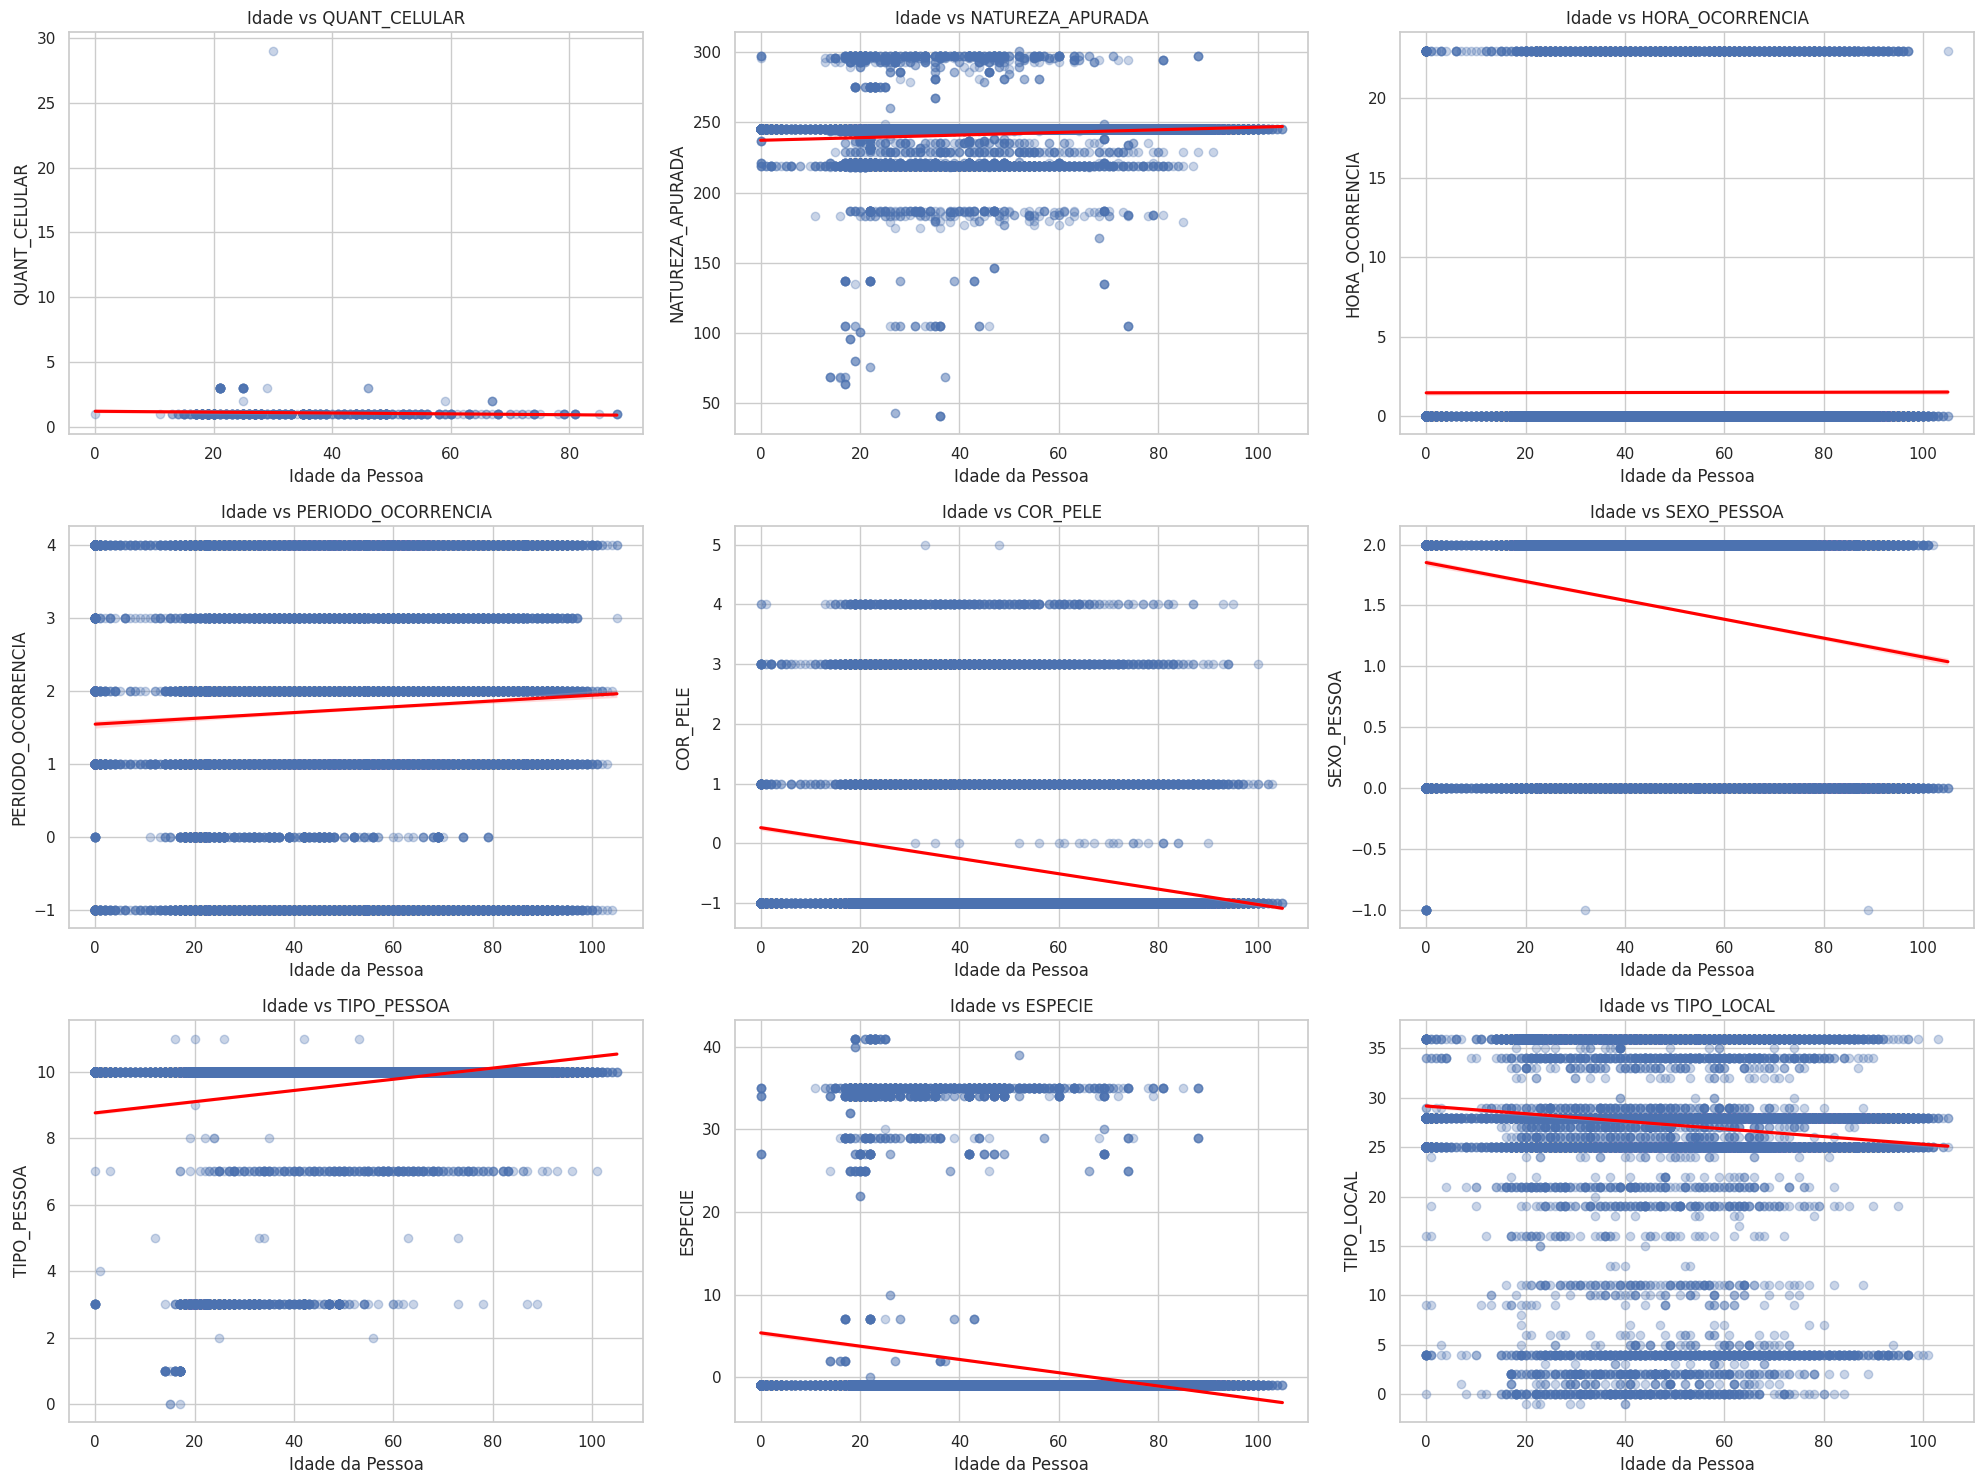

In [25]:
# Supondo que seu DataFrame seja df_tratado
dfc = df_tratado.copy()

# Lista de colunas de interesse
colunas = [
    'QUANT_CELULAR', 'NATUREZA_APURADA', 'HORA_OCORRENCIA',
    'PERIODO_OCORRENCIA', 'COR_PELE', 'SEXO_PESSOA',
    'TIPO_PESSOA', 'ESPECIE', 'TIPO_LOCAL'
]

# Codificar colunas categóricas (exceto quantiade de celular)
for col in colunas:
    if dfc[col].dtype == 'object' or dfc[col].dtype.name == 'category':
        dfc[col] = dfc[col].astype('category').cat.codes

# Tratar hora para extrair apenas o horário como número
if 'HORA_OCORRENCIA' in dfc.columns:
    try:
        dfc['HORA_OCORRENCIA'] = pd.to_datetime(df['HORA_OCORRENCIA'], errors='coerce').dt.hour
    except:
        pass

# Plotar os gráficos com linha de regressão
plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas):
    plt.subplot(3, 3, i + 1)
    sns.regplot(data=df, x='IDADE_PESSOA', y=col, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    plt.title(f'Idade vs {col}')
    plt.xlabel('Idade da Pessoa')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


No final as variaveis preditorias escolhidas, após varios testes foram, NATUREZA_APURADA (Alguns tipos de crime podem acontecer mais frequentemente com pessoas mais novas ou mais velhas)  e TIPO_LOCAL

In [17]:
# Variáveis preditoras
X = df_filtered[['NATUREZA_APURADA', 'TIPO_LOCAL']]
# Variável alvo
y = df_filtered['IDADE_PESSOA']

Codifica as variáveis categóricas com OneHotEncoder.

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         [
          'NATUREZA_APURADA', 'TIPO_LOCAL'])
    ],
    remainder='passthrough'
)

Divisao dos dados, para teste e treino.  
E treinamento do modelo.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['NATUREZA_APURADA',
                                                   'TIPO_LOCAL'])])),
                ('regressor', LinearRegression())])

Tentativa de predição.  
E resultados

In [22]:
y_pred = model.predict(X_test)

# RESULTADOS
print("=== REGRESSÃO PARA IDADE DA PESSOA ===")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

=== REGRESSÃO PARA IDADE DA PESSOA ===
MSE: 343.2114294962837
R²: 0.23765734555301254


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


O modelo apresenta um MSE relativamente alto, com erro médio de cerca de 18 anos e consegue explicar aproximadamente 24% da variabilidade da idade das pessoas envolvidas em boletins de ocorrência.

Esse resultado é inconclusivo,pode haver uma relação entre os dados disponíveis no boletim e a idade, porém o modelo não é confiavel, e preciso para ser usado de forma determinística ou preditiva em casos individuais.

Assim, podemos concluir que não é possível prever a idade de maneira aproximada com confiança.

## Pergunta 14 (Tiago, Ayko e Chang)
14. Kombis coloridas tem maior chance de serem roubadas por serem mais chamativas?(Regressão linear)

A partir dessa nossa hipótese, resolvemos tentar provar se essa relação entre a cor e a taxa de rouba é válida ou não, por meio da regressão linear.
Para isso, começamos filtrando o df para que possamos definir o que seriam as "kombis coloridas". Decidimos que as coloridas seriam quaisquer umas que não fossem pretas, brancas ou cinzas (retiramos as NaN também).
Então, partimos para a criação da flag que conseguiria a indicação de que uma Kombi foi furtada ou roubada

In [ ]:
df['ROUBOS_FURTOS'] = df['NATUREZA_APURADA'].str.contains('roubo|furto', na=False).astype(int)

In [ ]:

kombis = df.dropna(subset=['MODELO_VEICULO', 'COR_VEICULO'])
kombis = kombis[kombis['MODELO_VEICULO'].str.contains('KOMBI', case=False)]

cores_neutras = ['preta', 'branco', 'cinza']
kombis_coloridas = kombis[~kombis['COR_VEICULO'].str.lower().isin(cores_neutras)]


Daí, fizemos a utilização do getdummies, do exemplo da Letícia, para conseguirmos transformar a coluna COR_VEICULO em diferentes dummies, sendo uma nova coluna para cada cor. Também agrupamos por cor e fizemos a contagem de quantos roubos/furtos ocorreram com os veículos de cada cor.
E então obtemos a variável alvo, sendo o total de roubos/furtos por cor.

In [ ]:
df_grouped = kombis_coloridas.groupby('COR_VEICULO')['ROUBOS_FURTOS'].sum().reset_index()

X = pd.get_dummies(df_grouped['COR_VEICULO'])

y = df_grouped['ROUBOS_FURTOS']

Aqui, fizemos a divisão dos dados, para teste e treino, além do próprio treinamento do modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('regressor', LinearRegression())])

Por fim, obtivemos essa tentativa de predição e os seguintes resultados:

In [ ]:
# Predição
y_pred = model.predict(X_test)

# RESULTADOS
print("=== REGRESSÃO PARA ROUBOS/FURTOS ===")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

=== REGRESSÃO PARA ROUBOS/FURTOS ===
MSE: 2.7777777777777706
R²: -1.7777777777777706


Assim, podemos observar que esse modelo apresenta um MSE bem baixo, e um R² também suspeito.

Isso representa que não existe uma relação forte o suficiente entre a cor da Kombi e a quantidade de roubos e furtos envolvendo ela. Assim, não pode ser usada de forma preditiva.

Portanto, não é possível prever se uma Kombi colorida é mais visada por criminosos apenas por sua cor.

## Pergunta 16 (Rafael)

Aprendizado de Máquina: Algoritmo Supervisionado, Prever o Tipo de Crime por Dia da Semana

Anteriormente, na pergunta 12, estávamos associando o dia da semana com a quantidade de cada de tipo de crime, a proposta agora, é utilizar do algoritmo supervisionado de classifição, para prever o tipo de crime de acordo com a dia da semana. O mais interessante, é que além do fato dele ser um algoritmo simples, ele não apenas classifica, mas também fornece as probabilidades de cada classe, o que é perfeito para análise.

Vamos começar agrupando os vários tipos de crime furto, roubo e estelionato em um tipo só, pois um modelo de classificação tem muita dificuldade em aprender quando existem muitas classes de resultado possíveis, especialmente se algumas delas têm pouquíssimos exemplos. Ao agrupar, simplificamos o problema para o modelo, permitindo que ele encontre padrões mais fortes para as categorias mais relevantes.

In [ ]:
# Função para agrupar os tipos de crime em categorias maiores
def agrupar_crimes(natureza):
    natureza = str(natureza).lower()
    if 'furto' in natureza:
        return 'Furto'
    elif 'roubo' in natureza:
        return 'Roubo'
    elif 'estelionato' in natureza:
        return 'Estelionato'
    elif 'ameaça' in natureza or 'lesão corporal' in natureza:
        return 'Crimes Contra a Pessoa'
    else:
        return 'Outros'

df_modelo = df.dropna(subset=['NATUREZA_APURADA', 'DIA_SEMANA'])

# Cria a nova coluna 'CATEGORIA_CRIME' que será nosso alvo (Y)
df_modelo['CATEGORIA_CRIME'] = df_modelo['NATUREZA_APURADA'].apply(agrupar_crimes)

# Vamos remover os crimes 'Outros' para focar nas categorias mais relevantes
df_modelo = df_modelo[df_modelo['CATEGORIA_CRIME'] != 'Outros']

print("Distribuição das categorias de crime:")
print(df_modelo['CATEGORIA_CRIME'].value_counts())

C:\Users\USER\AppData\Local\Temp\ipykernel_12980\2217759715.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['CATEGORIA_CRIME'] = df_modelo['NATUREZA_APURADA'].apply(agrupar_crimes)


Distribuição das categorias de crime:
CATEGORIA_CRIME
Furto          293197
Roubo          287946
Estelionato      1849
Name: count, dtype: int64


"Furto" e "Roubo" são as categorias dominantes, com quase 300 mil ocorrências cada. "Estelionato", por outro lado, é uma classe muito minoritária, com menos de 2 mil casos. Isso é fundamental e explica muito do desempenho do modelo, como veremos a seguir.

In [ ]:
# Feature (variável preditora)
X = df_modelo[['DIA_SEMANA']]

# Alvo (variável a ser prevista)
y = df_modelo['CATEGORIA_CRIME']

# Codificar a variável categórica 'DIA_SEMANA' usando One-Hot Encoding
# Isso cria colunas binárias para cada dia da semana (ex: DIA_SEMANA_Segunda-feira)
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nFeatures após codificação (exemplo):")
print(X_encoded.head())


Features após codificação (exemplo):
       DIA_SEMANA_Quarta-feira  DIA_SEMANA_Quinta-feira  \
29376                    False                    False   
29377                    False                    False   
29378                    False                    False   
29379                    False                    False   
29380                    False                    False   

       DIA_SEMANA_Segunda-feira  DIA_SEMANA_Sexta-feira  DIA_SEMANA_S獺bado  \
29376                     False                    True              False   
29377                     False                   False               True   
29378                     False                    True              False   
29379                     False                   False               True   
29380                     False                    True              False   

       DIA_SEMANA_Ter癟a-feira  
29376                   False  
29377                   False  
29378                   False  
29379     

Aqui, utilizamos o One-Hot Encoding, pois modelos de machine learning, como a regressão logística, não entendem texto ("Segunda-feira"). Eles precisam de números. O One-Hot Encoding é a forma correta de fazer isso para dados categóricos sem ordem, pois ele não assume que "Terça-feira" é "maior" que "Segunda-feira", por exemplo.

O parâmetro drop_first=True é uma otimização estatística para evitar a multicolinearidade. Em termos simples, significa que as novas colunas são perfeitamente previsíveis umas pelas outras. Se soubermos que não é Segunda, Terça, Quarta, Quinta, Sexta, nem Sábado, então obrigatoriamente tem que ser Domingo. Por exemplo, Uma linha onde todas as colunas "DIA_SEMANA" estão marcadas como "False" representa a categoria que foi removida pelo drop_first=True. O modelo de machine learning entende que, se uma ocorrência não é Segunda, nem Terça, nem Quarta, etc... Ela só pode ser do dia que "sobrou" (o que foi descartado).

In [ ]:
# --- 3. Divisão, Treinamento e Avaliação ---

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar o modelo
# max_iter aumentado para garantir a convergência
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAcurácia do Modelo: {accuracy:.2%}\n")
print("Relatório de Classificação:")
print(report)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Acurácia do Modelo: 50.84%

Relatório de Classificação:
              precision    recall  f1-score   support

 Estelionato       0.00      0.00      0.00       555
       Furto       0.51      0.72      0.60     87959
       Roubo       0.51      0.30      0.37     86384

    accuracy                           0.51    174898
   macro avg       0.34      0.34      0.32    174898
weighted avg       0.51      0.51      0.48    174898



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Aqui, decidi deixar 70% para o treinamento e 30% para testar o modelo. Obtive uma acurácia de 50,84%, à primeira vista, pode parecer baixo. No entanto, se o modelo chutasse aleatoriamente entre 3 classes, a chance de acerto seria de aproximadamente 33.3%. Como 50.84% é significativamente melhor que isso, podemos concluir que o dia da semana, por si só, tem algum poder preditivo sobre o tipo de crime. Não é o fator mais forte, mas a relação existe e é estatisticamente relevante.

Agora vou analisar o resultado de cada um (Estelionato, furto e roubo).

*Estelionato:

O modelo teve um desempenho de 0% em tudo (precisão, recall, f1-score). Isso significa que ele falhou completamente em identificar qualquer caso de estelionato. Isso é um reflexo direto do desbalanceamento de classes que vimos no início. Com tão poucos exemplos (apenas 555 no conjunto de teste), o modelo aprendeu que é mais "seguro" nunca prever "Estelionato", pois a chance de errar seria muito alta. Para o modelo, é melhor focar em acertar "Furto" e "Roubo".

*Furto:

Recall de 0.72 (72%) é o número mais importante aqui. Significa que, de todos os furtos que realmente aconteceram, o modelo conseguiu identificar corretamente 72% deles. É um resultado bom, mostrando que o modelo é eficaz em "encontrar" os furtos.
Precisão de 0.51 (51%) significa que, quando o modelo disse que um crime era "Furto", ele estava certo em 51% das vezes.

*Roubo:

Recall de 0.30 (30%) é baixo. O modelo só conseguiu encontrar 30% dos roubos que realmente aconteceram. A maioria dos roubos foi, provavelmente, classificada erroneamente como "Furto".
Precisão de 0.51 (51%) é similar à do Furto.